# Deep Learning

## Beginning

AlexNet

## Transformer
Transformer 模型及其注意力机制是近年来自然语言处理（NLP）领域的重要创新之一，由 Vaswani 等人在 2017 年的论文《Attention Is All You Need》中提出。它在许多语言处理任务中都取得了显著的成绩。

### Transformer 的核心：注意力机制

Transformer 完全基于注意力机制，没有使用传统的循环神经网络（RNN）或卷积神经网络（CNN）结构。注意力机制允许模型在处理每个单词时直接查看输入序列中的任何其他位置，从而捕获更丰富的上下文信息。

#### 自注意力（Self-Attention）

自注意力是 Transformer 中最关键的部分。它可以被视为序列中的每个元素对序列中所有元素的映射。在自注意力中，对于每个元素，模型会计算一个注意力分数，表示其他元素对当前元素的重要性。

#### 计算步骤

1. **查询（Query）、键（Key）、值（Value）**：对于输入序列的每个元素，Transformer 使用三个不同的全连接层生成 Query、Key 和 Value。这些是注意力机制的基础。

2. **注意力分数**：计算 Query 与每个 Key 的点积，然后除以一个缩放因子（通常是 Key 的维度的平方根），并应用 softmax 函数以获得权重。

3. **加权的值和**：将注意力权重应用于相应的 Value，并将结果相加，得到当前元素的输出表示。

#### 公式表示

$$ \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V $$

其中，$ Q, K, V $ 分别是查询、键和值，$ d_k $ 是键的维度。

### Transformer 模型结构

#### 编码器和解码器

- **编码器**：由 N 个相同的层堆叠而成，每个层包含一个自注意力层和一个简单的前馈神经网络。
- **解码器**：也由 N 个相同的层堆叠而成，但每个层有两个自注意力模块，一个是标准的自注意力，另一个是编码器-解码器注意力，用于关注编码器的输出。

#### 层归一化和残差连接

每个子层（自注意力层或前馈层）的周围都有一个残差连接，并跟随一个层归一化步骤。这种结构有助于避免深层网络中的梯度消失问题。

### 应用场景

由于其高效的并行处理能力和对长距离依赖关系的有效捕捉，Transformer 已成为机器翻译、文本生成、语音识别等许多 NLP 任务的主要模型。此外，基于 Transformer 的模型，如 BERT 和 GPT 系列，在自然语言理解和生成方面也取得了巨大成功。

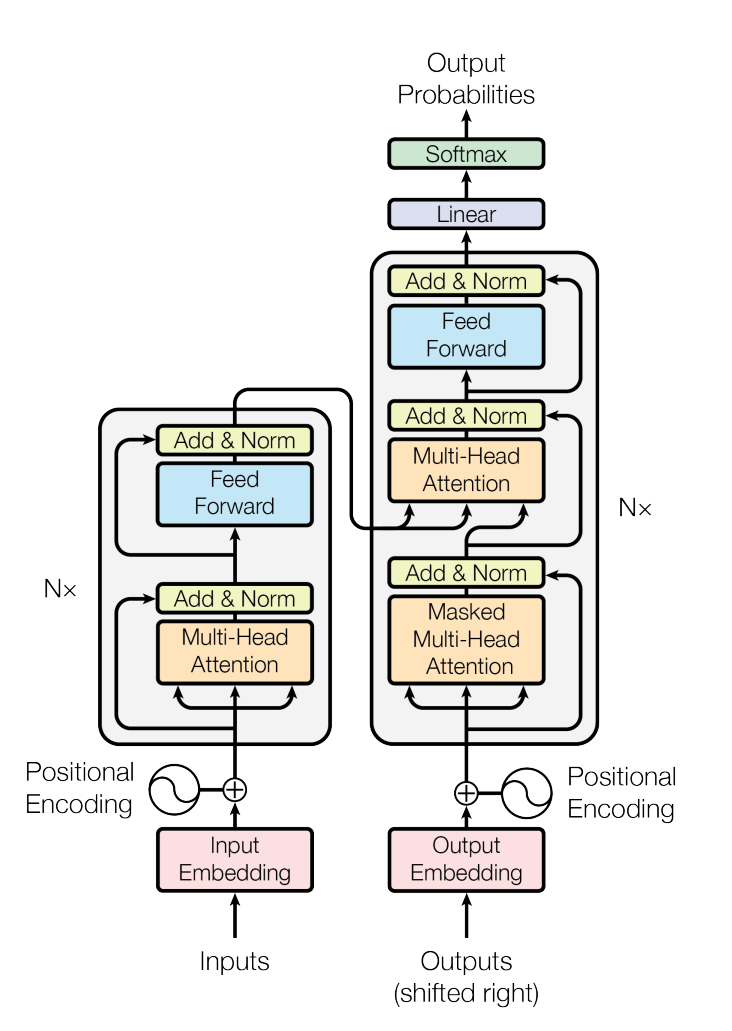

Transformer 模型背后的数学原理是深度学习中自然语言处理领域的一大突破。其核心是基于自注意力机制的编码器-解码器架构。下面我将详细介绍其数学原理：

### 1. 自注意力机制（Self-Attention）

自注意力是Transformer的核心，它允许模型在处理序列的每个元素时考虑到序列中的所有其他元素。

#### 数学原理：

对于给定的输入序列 $ X = [x_1, x_2, ..., x_n] $，首先通过三个不同的全连接层分别转换为查询（Query, Q）、键（Key, K）和值（Value, V）。

- **查询、键和值的计算**：
  $$ Q = XW^Q, \quad K = XW^K, \quad V = XW^V $$
  其中，$ W^Q, W^K, W^V $ 是可学习的权重矩阵。

- **注意力权重的计算**：
  $$ \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V $$
  其中，$ d_k $ 是键向量的维度。这里通过计算查询和键的点积来确定序列中各位置之间的关注程度，然后通过softmax获得标准化的权重。

### 2. 编码器和解码器

Transformer 的整体架构包括编码器和解码器。

#### 编码器：

- **编码器层**：每个编码器层包含两个子层。第一个子层是多头自注意力机制，第二个是简单的位置全连接前馈网络。
- **残差连接和层归一化**：每个子层的输出是 `LayerNorm(x + Sublayer(x))`，其中 `Sublayer(x)` 是子层自身的操作。

#### 解码器：

- **解码器层**：每个解码器层也有两个子层，但加入了第三个子层，用于从编码器的输出中进行注意力操作。
- **遮蔽自注意力**：解码器中的自注意力层被修改为遮蔽（masked），以防止未来位置的信息流入。

### 3. 位置编码

由于Transformer不像RNN那样自然地处理序列中的位置信息，所以需要添加位置编码到输入中。

- **位置编码公式**：
  $$ PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) $$
  $$ PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) $$
  其中，$ pos $ 是位置，$ i $ 是维度。这样每个维度的位置编码是一个正弦波，波长形成一个几何级数。

### 4. 多头注意力

- **多头注意力**：Transformer 在自注意力的基础上扩展为多头注意力，允许模型同时关注来自不同位置的不同表示子空间的信息。
- **数学公式**：
  $$ \text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O $$
  其中，每个头 $\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)$。

### 5. 前馈网络

- **前馈网络**：每个编码器和解码器层都包含一个全连接的前馈网络，通常是两个线性变换和一个ReLU激活函数。

### 应用

Transformer

 因其能够捕获长距离依赖关系而在NLP任务中表现卓越，是BERT、GPT等模型的基础结构，广泛用于文本分类、翻译、摘要生成等任务。


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class TransformerModel(nn.Module):
    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        from torch.nn import TransformerEncoder, TransformerEncoderLayer
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# 设置模型参数
ntokens = 1000 # 词汇表大小，可以根据实际情况调整
emsize = 128   # 嵌入维度，降低为128
nhid = 128     # 前馈网络维度，降低为128
nlayers = 1    # Transformer层数，减少到1层
nhead = 1      # 多头注意力的头数，减少到1
dropout = 0.2  # dropout比率

# 实例化模型
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout)

- 使用随机生成的数据集

In [3]:
import torch.optim as optim
import math

# 创建一些伪造的数据来模拟训练数据
def generate_batch(batch_size, length, vocab_size):
    return torch.randint(0, vocab_size, (batch_size, length))

# 模型实例化
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练参数
epochs = 10
batch_size = 20
seq_length = 30

# 训练循环
for epoch in range(epochs):
    model.train()
    total_loss = 0.
    for batch in range(100): # 假设每个epoch有100个批次
        data = generate_batch(batch_size, seq_length, ntokens)
        targets = generate_batch(batch_size, seq_length, ntokens)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.view(-1, ntokens), targets.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f'Epoch {epoch}, Loss: {total_loss / 100}')


Epoch 0, Loss: 7.011293182373047
Epoch 1, Loss: 6.955989670753479
Epoch 2, Loss: 6.945677680969238
Epoch 3, Loss: 6.9377408742904665
Epoch 4, Loss: 6.931805877685547
Epoch 5, Loss: 6.926559309959412
Epoch 6, Loss: 6.923338494300842
Epoch 7, Loss: 6.919680013656616
Epoch 8, Loss: 6.9168159914016725
Epoch 9, Loss: 6.915369787216187


In [5]:
def predict(model, input_seq, ntokens, seq_length):
    model.eval()
    with torch.no_grad():
        input_seq = torch.tensor(input_seq).unsqueeze(0)
        output = model(input_seq)
        _, predicted_indices = torch.max(output, dim=2)
        return predicted_indices[0].tolist()

# 生成一个示例输入序列
input_seq = generate_batch(1, seq_length, ntokens)[0].tolist()

# 进行预测
predicted_seq = predict(model, input_seq, ntokens, seq_length)
print(predicted_seq)


[716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716, 716]


- 使用torchtext库中的IMDb电影评论数据集

为了使用一个已有的第三方库中的数据集进行训练，我们可以选择一个常用的文本数据集。一个常见的选择是使用`torchtext`库中的IMDb电影评论数据集，这个数据集常用于情感分析任务。我们将使用这个数据集来训练一个简化版的Transformer模型。

首先，确保你安装了必要的库，包括`torchtext`。如果没有安装，可以通过运行`pip install torchtext`来安装。

然后，我们将按照以下步骤进行操作：

1. 导入数据集并进行预处理。
2. 准备数据加载器。
3. 定义和训练Transformer模型。
4. 在测试数据上评估模型。

这里是完整的实现代码：

In [30]:
from torchtext.datasets import IMDB

IMDB.download('.data') # 下载IMDB数据集

'.data\\imdb\\aclImdb'

In [33]:
import torch
from torch import nn
import torch.optim as optim
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import random

# 创建自定义数据集类
class IMDBDataset(Dataset):
    def __init__(self, split):
        self.imdb_data = list(IMDB(path='.data', text_field='text', label_field='sentiment'))
        random.seed(1234)
        random.shuffle(self.imdb_data)
        split_point = int(len(self.imdb_data) * 0.8)
        self.imdb_data = self.imdb_data[:split_point] if split == 'train' else self.imdb_data[split_point:]
        self.tokenizer = get_tokenizer('basic_english')

        # 创建词汇表
        self.vocab = build_vocab_from_iterator(map(lambda x: self.tokenizer(x[1]), self.imdb_data))
        self.vocab.set_default_index(self.vocab['<unk>'])

    def __len__(self):
        return len(self.imdb_data)

    def __getitem__(self, idx):
        label, text = self.imdb_data[idx]
        return (1 if label == 'pos' else 0, self.vocab(self.tokenizer(text)))

# 创建DataLoader的collate函数
def collate_batch(batch):
    label_list, text_list = zip(*batch)
    lengths = [len(t) for t in text_list]
    text_list_padded = pad_sequence(text_list, padding_value=0)
    return torch.tensor(label_list), text_list_padded, torch.tensor(lengths)

# 加载IMDB数据集
train_dataset = IMDBDataset(split='train')
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_batch)
test_dataset = IMDBDataset(split='test')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True, collate_fn=collate_batch)

# 模型参数
ntokens = len(train_dataset.vocab) # 词汇表大小
emsize = 128          # 嵌入维度
nhid = 128            # 前馈网络维度
nlayers = 1           # 层数
nhead = 1             # 头的数量
dropout = 0.2         # dropout比率

# 实例化模型、定义损失函数和优化器
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
def train(dataloader):
    model.train()
    total_loss = 0
    for labels, texts, lengths in dataloader:
        optimizer.zero_grad()
        output = model(texts)
        loss = criterion(output.view(-1, ntokens), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# 测试模型
def evaluate(dataloader):
    model.eval()
    total_accuracy = 0
    with torch.no_grad():
        for labels, texts, lengths in dataloader:
            output = model(texts)
            predictions = output.argmax(1)
            total_accuracy += (predictions == labels).sum().item()
    return total_accuracy / len(dataloader.dataset)

# 训练循环
epochs = 5
for epoch in range(epochs):
    train_loss = train(train_loader)
    print(f'Epoch {epoch}, Training loss: {train_loss}')
    test_accuracy = evaluate(test_loader)
    print(f'Epoch {epoch}, Test accuracy: {test_accuracy}')

0lines [00:00, ?lines/s]


AttributeError: 'Vocab' object has no attribute 'set_default_index'

这段代码首先从`torchtext`库中加载IMDb数据集，并使用基本的英语分词器进行分词。然后，它构建了一个词汇表，并定义了数据加载器，以便在训练和测试过程中使用。之后，代码定义了一个简化版的Transformer模型，并进行了训练和测试。

请注意，由于IMDb

是一个情感分类数据集，模型的输出被设计为二分类（正面或负面评价）。因此，我们在这里使用了交叉熵损失函数（`nn.CrossEntropyLoss`）。这是一个简单的例子，实际应用中可能需要更复杂的数据预处理和模型调整。

生成对抗网络（GAN，Generative Adversarial Networks）是深度学习中的一种架构，由 Ian Goodfellow 等人于 2014 年提出。GAN 被广泛用于生成数据，特别是在图像生成领域取得了显著的成果。

### GAN 的基本原理

GAN 包括两个主要部分：一个生成器（Generator）和一个判别器（Discriminator）。这两个网络相互对抗，从而提升各自的性能。

#### 生成器（Generator）

- **功能**：生成器尝试生成尽可能真实的数据。它接收一个随机噪声向量作为输入，并输出一个与真实数据相似的实例。
- **目标**：欺骗判别器，使其无法区分生成的数据和真实数据。

#### 判别器（Discriminator）

- **功能**：判别器的目标是区分真实数据和生成器生成的伪造数据。
- **目标**：准确识别出真实数据和生成的数据。

### GAN 的训练过程

GAN 的训练涉及到一个双方博弈的过程：

1. **训练判别器**：对于一批真实数据，判别器应该输出高的“真实性”分数。对于生成器生成的数据，判别器应该输出低的“真实性”分数。
2. **训练生成器**：生成器的目标是提升其生成数据的“真实性”，以便欺骗判别器。

这个过程可以用下面的损失函数来描述：

- **判别器损失**：
  $$ L_D = -\frac{1}{2} \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] - \frac{1}{2} \mathbb{E}_{z \sim p_z(z)}[\log (1 - D(G(z)))] $$

- **生成器损失**：
  $$ L_G = -\frac{1}{2} \mathbb{E}_{z \sim p_z(z)}[\log D(G(z))] $$

其中，$ D(x) $ 是判别器对于样本 $ x $ 的输出（表示为真实数据的概率），$ G(z) $ 是生成器的输出，$ z $ 是从随机噪声分布 $ p_z $ 中采样的向量。

### 数学原理

GAN 的核心数学概念基于博弈论中的纳什均衡，即在最优状态下，生成器和判别器都无法进一步改进自己的策略。理想情况下，生成器将产生与真实数据分布完全一致的数据，判别器则完全无法区分真实数据与生成数据，对于任意输入，输出“真实”与“假”的概率都是 50%。

### 应用

GAN 在图像生成领域特别有效，如合成逼真的人脸图像、艺术作品风格转换、图像超分辨率等。此外，它们也被用于视频生成、语音合成、数据增强等领域。

### 注意点

GAN 训练是有挑战性的，可能涉及到模式崩溃（其中生成器开始生成极其有限的数据样本）和训练不稳定性。因此，设计和训练 GAN 需要仔细选择架构、损失函数和训练策略。

In [10]:
# Given parameters
principal = 30000  # Initial amount owed
monthly_income = 2500  # Friend's monthly income
repayment_rate = 0.05  # Percentage of income used for repayment
annual_interest_rate = 0.0499  # Annual interest rate

# Monthly repayment amount
monthly_repayment = monthly_income * repayment_rate

# Monthly interest rate
monthly_interest_rate = annual_interest_rate / 12

# Initialize variables for calculation
total_months = 0
remaining_principal = principal

# Calculation loop
while remaining_principal > 0:
    # Add interest
    remaining_principal *= (1 + monthly_interest_rate)
    # Subtract repayment
    remaining_principal -= monthly_repayment
    # Increase month count
    total_months += 1
    # If repayment is greater than remaining principal, break the loop
    if monthly_repayment > remaining_principal:
        break

total_months


1497